In [3]:
from __init__ import *

In [4]:
#summary statics 
df=pd.read_csv("../data/sierraleone-bumbuna.csv")
summary_stats=df.describe()
print(summary_stats)

        GHI  DNI  DHI ModA ModB Tamb   RH   WS WSgust WSstdev   WD WDstdev  \
count     0    0    0    0    0    0    0    0      0       0    0       0   
unique    0    0    0    0    0    0    0    0      0       0    0       0   
top     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN     NaN  NaN     NaN   
freq    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN     NaN  NaN     NaN   

         BP Cleaning Precipitation TModA TModB Comments  
count     0        0             0     0     0        0  
unique    0        0             0     0     0        0  
top     NaN      NaN           NaN   NaN   NaN      NaN  
freq    NaN      NaN           NaN   NaN   NaN      NaN  


In [5]:
# check for missing values
missing_values=df.isnull().sum()
print("Missing values:\n",missing_values)

Missing values:
 GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
Comments         0
dtype: int64


In [6]:
#checking for outlier or incorrect entries
numeric_columns=['GHI',"DNI",'DHI',"WS",'WSgust','ModA',"ModB","Tamb","RH","WD","TModA","Precipitation","WSstdev","WDstdev","BP"]
for col in numeric_columns:
    print(f'Summary for {col}:\n',df[col].describe())
    if (df[col]<0).any():
        print(f'negative values found in {col}')
    

Summary for GHI:
 count       0
unique      0
top       NaN
freq      NaN
Name: GHI, dtype: object
Summary for DNI:
 count       0
unique      0
top       NaN
freq      NaN
Name: DNI, dtype: object
Summary for DHI:
 count       0
unique      0
top       NaN
freq      NaN
Name: DHI, dtype: object
Summary for WS:
 count       0
unique      0
top       NaN
freq      NaN
Name: WS, dtype: object
Summary for WSgust:
 count       0
unique      0
top       NaN
freq      NaN
Name: WSgust, dtype: object
Summary for ModA:
 count       0
unique      0
top       NaN
freq      NaN
Name: ModA, dtype: object
Summary for ModB:
 count       0
unique      0
top       NaN
freq      NaN
Name: ModB, dtype: object
Summary for Tamb:
 count       0
unique      0
top       NaN
freq      NaN
Name: Tamb, dtype: object
Summary for RH:
 count       0
unique      0
top       NaN
freq      NaN
Name: RH, dtype: object
Summary for WD:
 count       0
unique      0
top       NaN
freq      NaN
Name: WD, dtype: object
Summ

In [9]:
# check for outlier using the IOR method
df_clean=df.copy()
for col in numeric_columns:
    z_scores=stats.zscore(df[col].dropna())
    df_clean=df_clean[(abs(z_scores) < 3)]
df = pd.read_csv('../data/sierraleone-bumbuna.csv')# reloded needed becouse of some column removal

C:\Users\HP\AppData\Local\Temp\ipykernel_11312\675145657.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean=df_clean[(abs(z_scores) < 3)]
C:\Users\HP\AppData\Local\Temp\ipykernel_11312\675145657.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean=df_clean[(abs(z_scores) < 3)]
C:\Users\HP\AppData\Local\Temp\ipykernel_11312\675145657.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean=df_clean[(abs(z_scores) < 3)]
C:\Users\HP\AppData\Local\Temp\ipykernel_11312\675145657.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean=df_clean[(abs(z_scores) < 3)]
C:\Users\HP\AppData\Local\Temp\ipykernel_11312\675145657.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean=df_clean[(abs(z_scores) < 3)]
C:\Users\HP\AppData\Local\Temp\ipykernel_11312\675145657.py:5: UserWarning: Boolean Series key will 

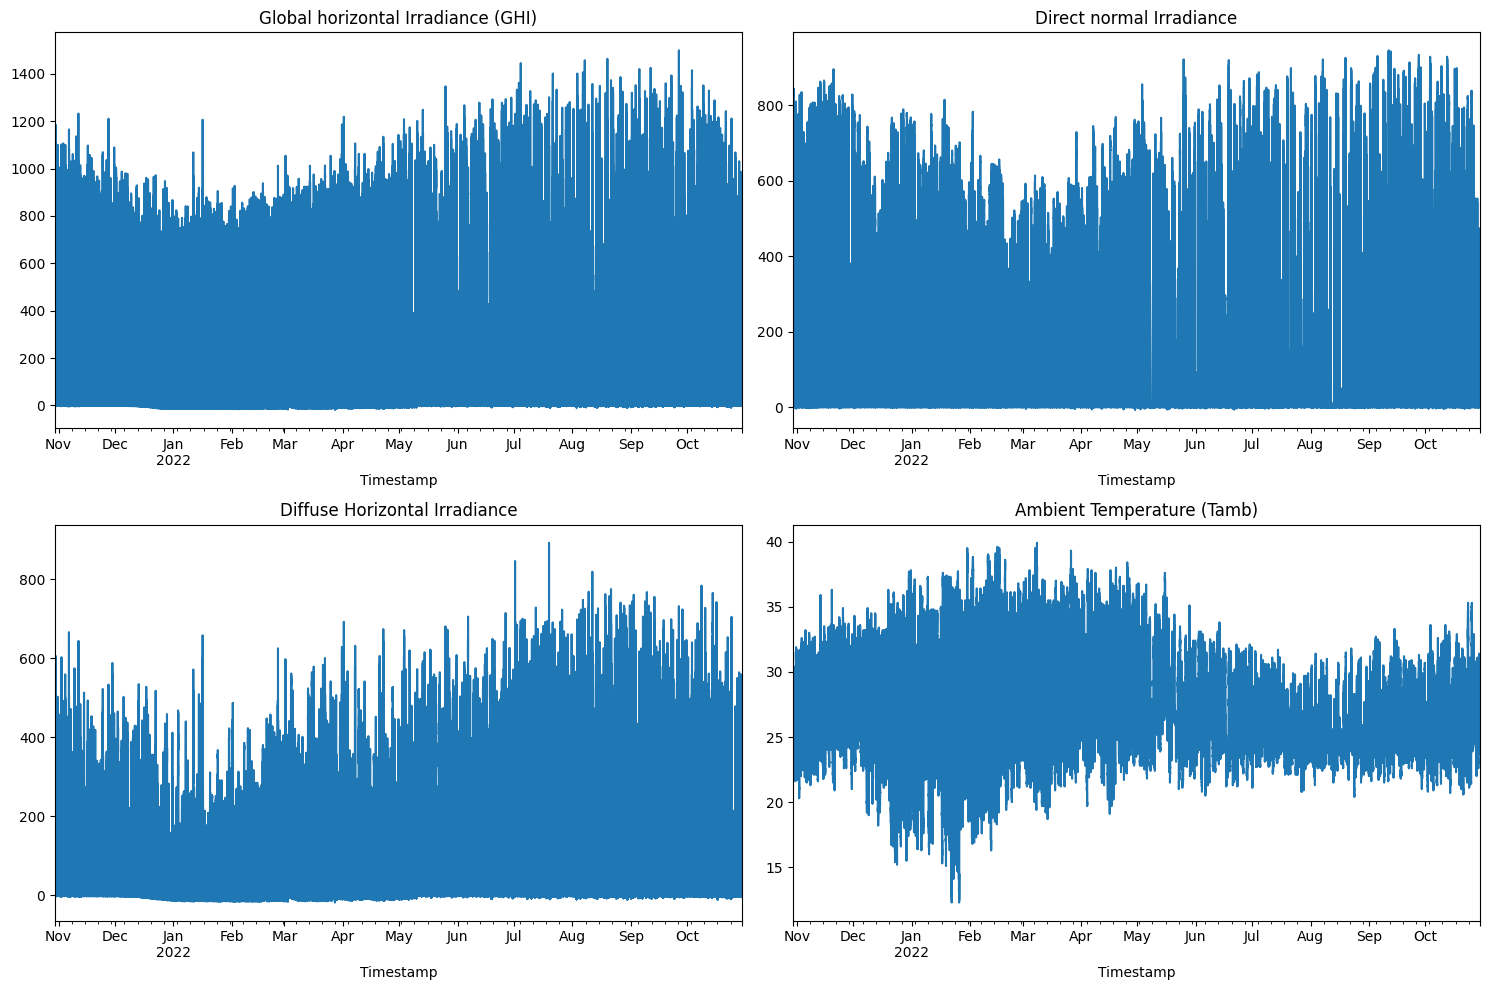

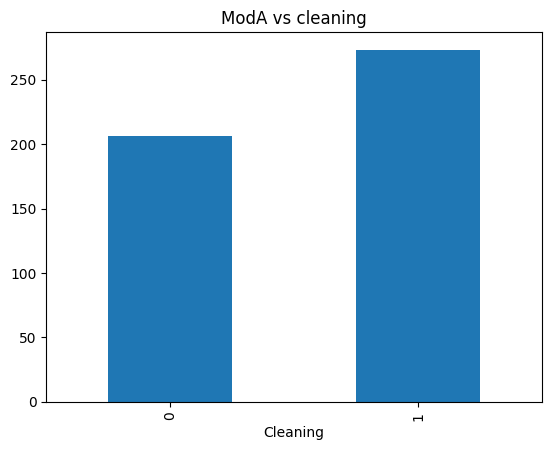

In [10]:
#time series analysis
df["Timestamp"]=pd.to_datetime(df['Timestamp'])
df.set_index("Timestamp",inplace=True)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
df['GHI'].plot(title="Global horizontal Irradiance (GHI)")
plt.subplot(2,2,2)
df['DNI'].plot(title="Direct normal Irradiance")
plt.subplot(2,2,3)
df['DHI'].plot(title="Diffuse Horizontal Irradiance")
plt.subplot(2,2,4)
df['Tamb'].plot(title="Ambient Temperature (Tamb)")
plt.tight_layout()
plt.show()
#plot cleaning impact
df.groupby('Cleaning')['ModA'].mean().plot(kind='bar',title='ModA vs cleaning')
plt.show()


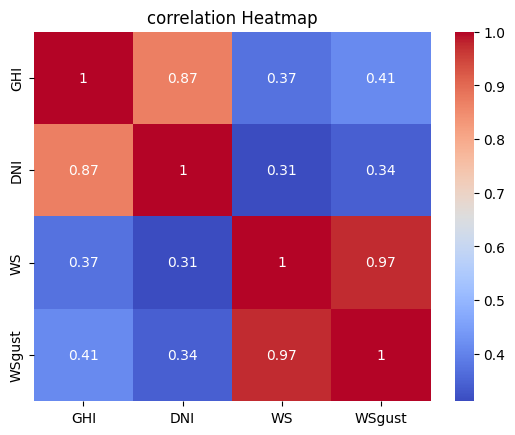

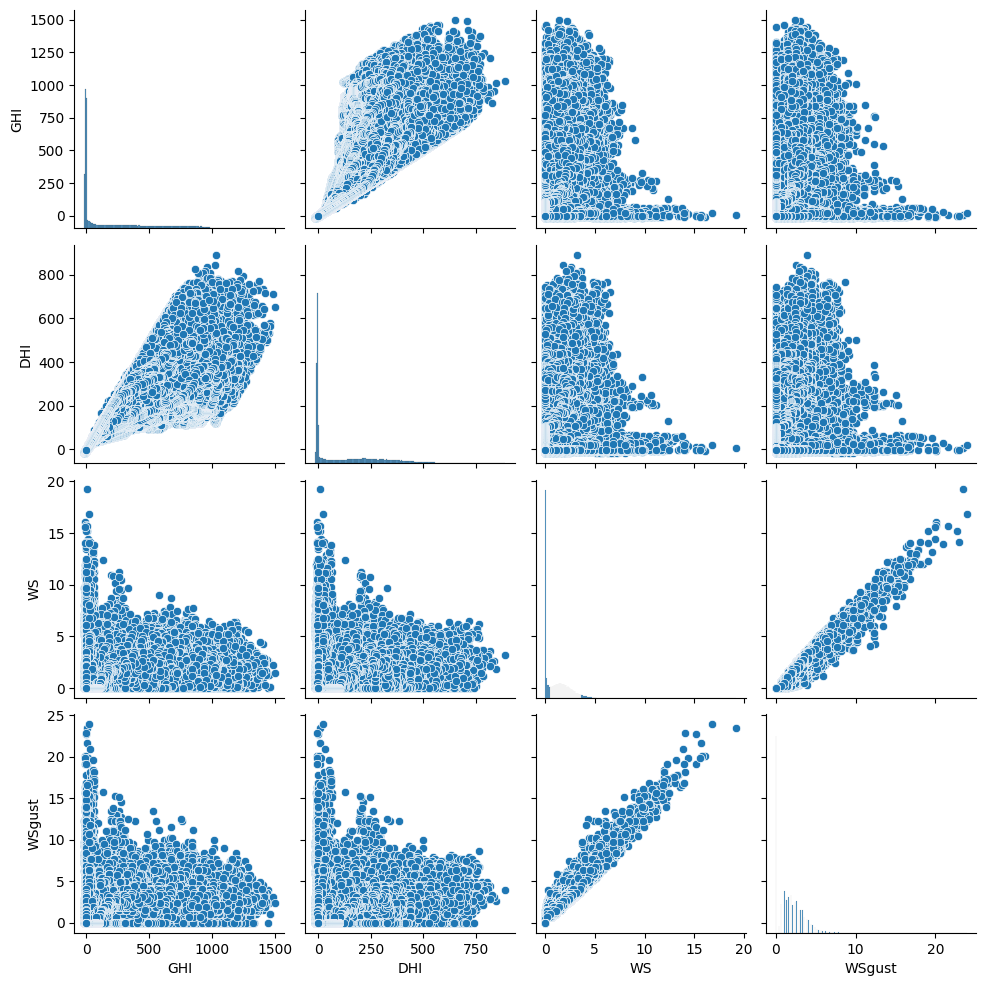

In [11]:
# correlation analysis  
#correlation heatmap
correlation_matrix=df[["GHI","DNI","WS","WSgust"]].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("correlation Heatmap")
plt.show()

#scatter matrices
sns.pairplot(df[["GHI",'DHI','WS','WSgust']])
plt.show()

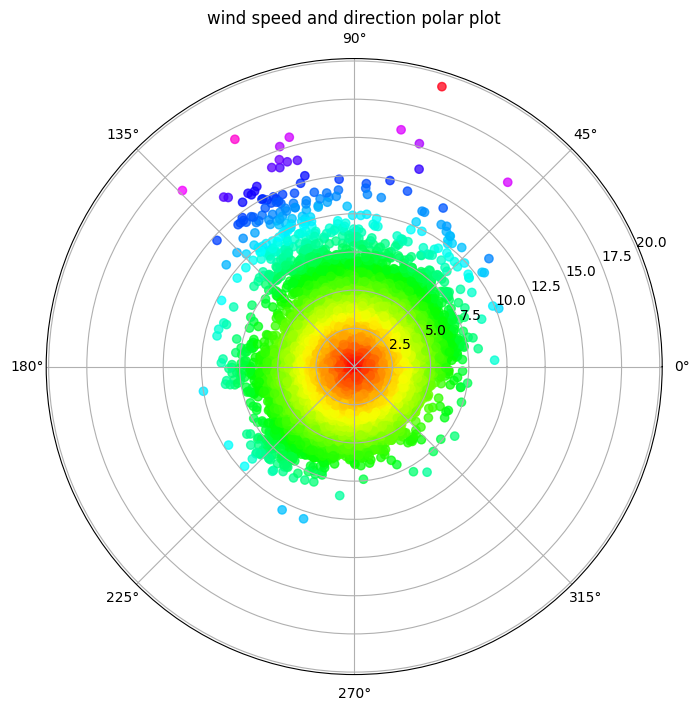

In [12]:
#wind analysis
# wind speed and direction polat plot
plt.figure(figsize=(8,8))
ax=plt.subplot(111,projection='polar')
wind_dir=np.deg2rad(df['WD'].dropna())
wind_speed=df['WS'].dropna()
ax.scatter(wind_dir, wind_speed, c=wind_speed, cmap='hsv', alpha=0.75)
plt.title("wind speed and direction polar plot")
plt.show()

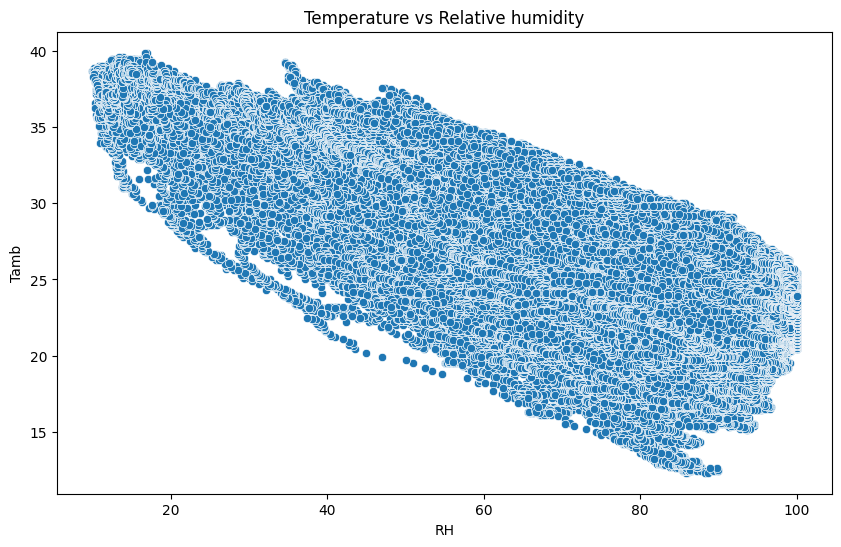

In [13]:
#tempreture analysis
#tempreature vs.relative humidity
plt.figure(figsize=(10,6))
sns.scatterplot(x='RH',y='Tamb',data=df)
plt.title('Temperature vs Relative humidity')
plt.show()

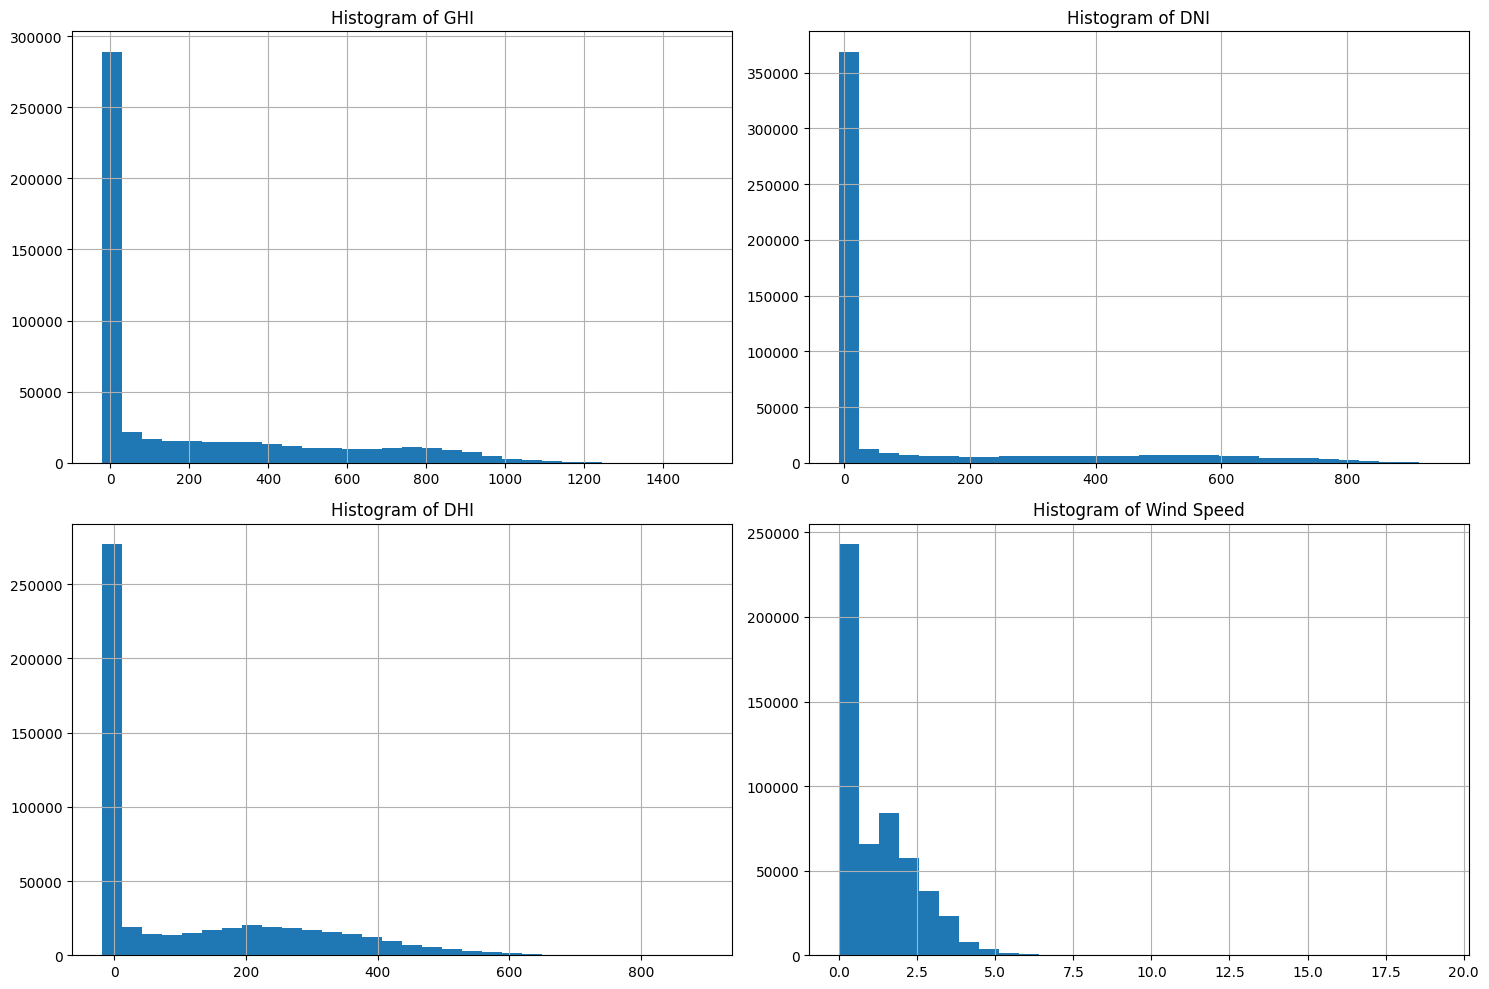

In [14]:
# Plot histograms for variables
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
df['GHI'].hist(bins=30)
plt.title('Histogram of GHI')
plt.subplot(2, 2, 2)
df['DNI'].hist(bins=30)
plt.title('Histogram of DNI')
plt.subplot(2, 2, 3)
df['DHI'].hist(bins=30)
plt.title('Histogram of DHI')
plt.subplot(2, 2, 4)
df['WS'].hist(bins=30)
plt.title('Histogram of Wind Speed')
plt.tight_layout()
plt.show()


In [15]:
# Z-score for detecting anomalies
df_z_scores = df.copy()
for col in numeric_columns:
    df_z_scores[col + '_zscore'] = stats.zscore(df[col].dropna())


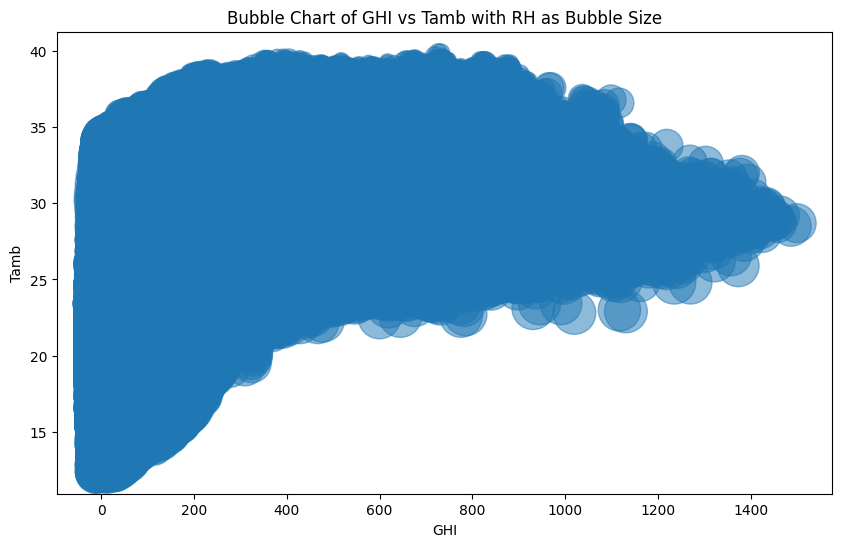

In [16]:
# Bubble chart GHI vs Tamb with bubble size representing RH
plt.figure(figsize=(10, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Chart of GHI vs Tamb with RH as Bubble Size')
plt.show()


In [17]:
#cleaning the data
# Handling missing values
df_cleaned = df.dropna(subset=['Comments'])  # Example: Dropping rows where Comments are null
df_cleaned.to_csv('../data/sierraleone-bumbuna.csv', index=False)
